In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx

In [2]:
# generate some data with noise
x = np.sort(np.random.uniform(0, 15, 30))
y = 5 + 0.5 * x + 0.1 * np.random.randn(len(x))

In [4]:
# find L1 line fit
l1 = lambda x0, x, y: np.sum(np.abs(x0[0] * x + x0[1] - y))
opt1 = spopt.fmin(func=l1, x0=[1, 1], args=(x, y))

# find L2 line fit
l2 = lambda x0, x, y: np.sum(np.power(x0[0] * x + x0[1] - y, 2))
opt2 = spopt.fmin(func=l2, x0=[1, 1], args=(x, y))

Optimization terminated successfully.
         Current function value: 2.218516
         Iterations: 52
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.280879
         Iterations: 46
         Function evaluations: 86


In [6]:
y2 = y.copy()
y2[3] += 5
y2[13] -= 10
xopt12 = spopt.fmin(func=l1, x0=[1, 1], args=(x, y2))
xopt22 = spopt.fmin(func=l2, x0=[1, 1], args=(x, y2))

Optimization terminated successfully.
         Current function value: 17.036681
         Iterations: 53
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 122.021909
         Iterations: 48
         Function evaluations: 88


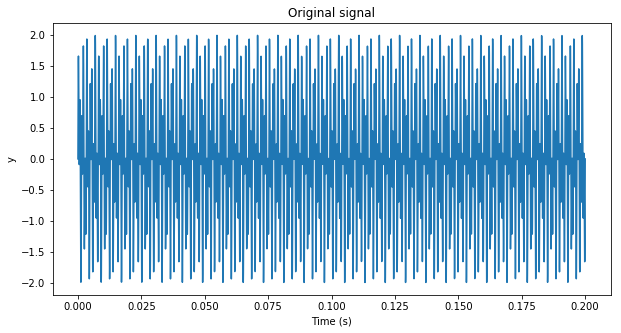

In [10]:
# sum of two sinusoids
n = 10000
t = np.linspace(0, 1/5, n)
y = np.sin(1250 * np.pi * t) + np.sin(3000 * np.pi * t)
yt = spfft.dct(y, norm='ortho')
plt.figure(figsize=[10,5])
plt.plot(t,y)
plt.title('Original signal')
plt.xlabel('Time (s)')
plt.ylabel('y')



In [8]:
m = 1000 # 10% sample
ran = np.random.choice(n, m, replace=False) # random sample of indices
ran.sort() # sorting not strictly necessary, but convenient for plotting
t2 = t[ran]
y2 = y[ran]

In [11]:
# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = A[ran]
# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  +4.986e-22  +6e+04  1e+00  1e-02  1e+00  3e+00    ---    ---    1  1  - |  -  - 
 1  +1.843e+02  +1.844e+02  +3e+04  9e-01  5e-03  6e-01  1e+00  0.6016  1e-01   1  1  1 |  0  0
 2  +2.368e+02  +2.371e+02  +2e+04  8e-01  4e-03  7e-01  1e+00  0.3928  6e-01   2  1  0 |  0  0
 3  +3.080e+02  +3.083e+02  +2e+04  6e-01  3e-03  5e-01  8e-01  0.5850  4e-01   1  1  1 |  0  0
 4  +3.660e+02  +3.662e+02  +9e+03  4e-01  2e-03  3e-01  5e-01  0.5546  3e-01   1  1  1 |  0  0
 5  +4.180e+02  +4.181e+02  +5e+03  2e-01  1e-03  2e-01  3e-01  0.5174  2e-01   1  1  1 |  0  0
 6  +4.659e+02  +4.660e+02  +3e+03  1e-01  5e-04  1e-01  2e-01  0.5998  3e-01   1  1  1 |  0  0
 7  +5.209e+02  +5.209e+02  +2e+03  6e-02  3e-04  7e-02  8e-02  0.6191  2e-01   1  1  1 |  0  0
 8  +5.643e+02  +5.643e+02  +7e+02  3e-02  1e-

In [12]:
# reconstruct signal
x = np.array(vx.value)
x = np.squeeze(x)
signal = spfft.idct(x, norm='ortho', axis=0)